In [10]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')
from tqdm import tqdm

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def drug_response_curve(x, Einf, EC50, HS, E0=100):
    y = Einf + (E0 - Einf)/(1 + (x/EC50)**HS)
    return y

In [13]:
def calc_responses(df, dose):
    Einf = df['Einf'].values
    EC50 = df['EC50'].values
    HS = df['HS'].values
    n_curves = df.shape[0]
    #r2 = np.zeros(len(dose_response))
    responses_pred = np.zeros(n_curves)
    for i in range(n_curves):
        responses_pred[i] = drug_response_curve(dose, Einf[i], EC50[i], HS[i]).item()
    return responses_pred

In [14]:
df_resp = pd.read_parquet('../../NO_BACKUP/pharmacodb/drug_response_curves_agg_r2_top0.7.parquet')

In [15]:
resp_test = df_resp['dose_response'].values
resp_test_ = []
for i in range(len(resp_test)):
    for j in range(len(resp_test[i])):
        resp_test_.append(resp_test[i][j]['response'])

In [16]:
df_sig = pd.read_parquet('../../NO_BACKUP/lincs_2020/sig_overlap.parquet')

In [17]:
df_sig = df_sig[df_sig['cell_drug'].isin(df_resp['cell_drug'])].reset_index()

In [9]:
doses = df_sig['nearest_dose'].values
cell_drugs = df_sig['cell_drug'].values
responses = []
for i in tqdm(range(len(cell_drugs))):
    cell_drug = cell_drugs[i]
    df = df_resp[df_resp['cell_drug'] == cell_drug].reset_index().copy()
    responses.append(np.array(calc_responses(df, doses[i])).mean().item())
    #if len(responses[-1]) == 0:
    #    break

100%|██████████| 40509/40509 [04:20<00:00, 155.78it/s]


In [18]:
df_sig['responses'] = responses

(array([ 3779.,  2889.,  2789.,  2485.,  2142.,  2307.,  2159.,  2454.,
         3298., 16170.]),
 array([5.59159859e-08, 1.00000001e+01, 2.00000000e+01, 3.00000000e+01,
        4.00000000e+01, 5.00000000e+01, 6.00000000e+01, 7.00000000e+01,
        8.00000000e+01, 9.00000000e+01, 1.00000000e+02]),
 <BarContainer object of 10 artists>)

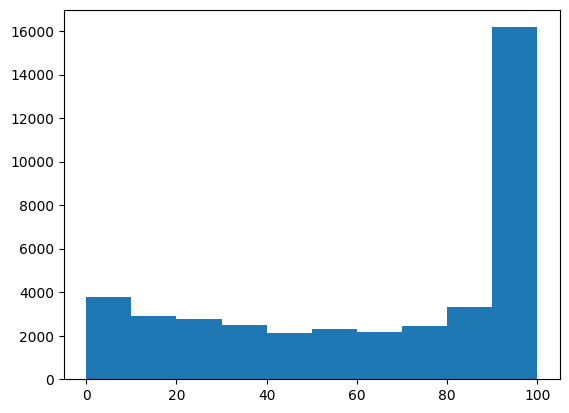

In [19]:
plt.hist(df_sig['responses'])

(array([2.0000e+00, 2.2000e+01, 2.2000e+02, 1.2599e+04, 1.4319e+04,
        2.0917e+04, 1.8817e+04, 1.5683e+04, 1.8318e+04, 4.4619e+04]),
 array([-43.        , -28.70047882, -14.40095764,  -0.10143647,
         14.19808471,  28.49760589,  42.79712707,  57.09664825,
         71.39616942,  85.6956906 ,  99.99521178]),
 <BarContainer object of 10 artists>)

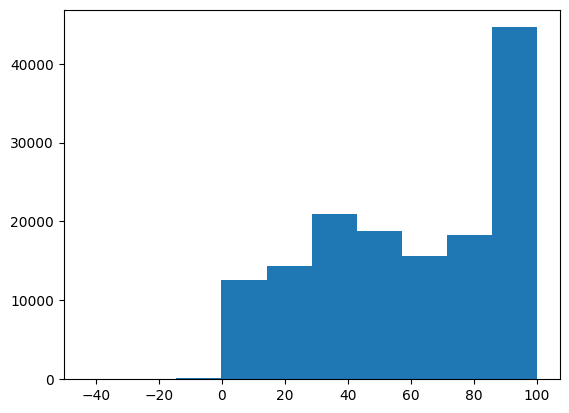

In [20]:
plt.hist(np.array(resp_test_)[np.array(resp_test_)<100])

(array([9.61164567e-07, 1.05728102e-05, 1.05728102e-04, 6.05485619e-03,
        6.88145772e-03, 1.00523396e-02, 9.04311683e-03, 7.53697195e-03,
        8.80330627e-03, 2.14431009e-02]),
 array([-43.        , -28.70047882, -14.40095764,  -0.10143647,
         14.19808471,  28.49760589,  42.79712707,  57.09664825,
         71.39616942,  85.6956906 ,  99.99521178]),
 <BarContainer object of 10 artists>)

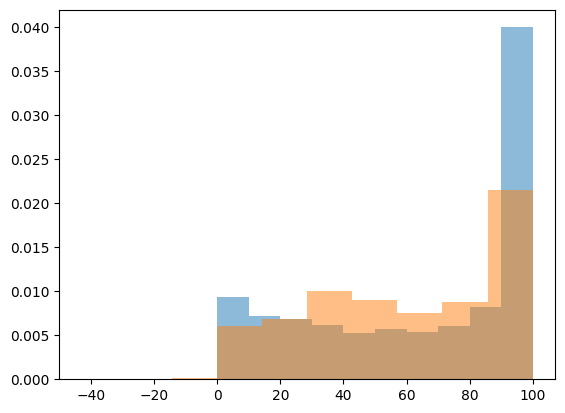

In [21]:
plt.hist(df_sig['responses'], density=True, alpha=0.5)
plt.hist(np.array(resp_test_)[np.array(resp_test_)<100], density=True, alpha=0.5)

In [22]:
df_sig['responses'] = df_sig['responses']/100

In [23]:
df_sig

,level_0,index,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,...,distil_ids,build_name,project_code,cmap_name_x,is_ncs_exemplar,cellosaurus_id,cmap_name_y,inchi_key,cell_drug,responses
0,0,123,b15,2.50,2.50000,uM,2.5 uM,24 h,24.0,h,...,ABY001_HT29_XH_X1_B15:E18|ABY001_HT29_XH_X1_B1...,None,ABY,HMN-214,0,CVCL_0320,HMN-214,OCKHRKSTDPOHEN-BQYQJAHWSA-N,CVCL_0320OCKHRKSTDPOHEN-BQYQJAHWSA-N,0.191586
1,1,139,f1b10,1.11,1.11111,uM,1.11 uM,24 h,24.0,h,...,AML001_HL60_24H_X1_F1B10:H11|AML001_HL60_24H_X...,None,AML,tretinoin,0,CVCL_0002,tretinoin,SHGAZHPCJJPHSC-YCNIQYBTSA-N,CVCL_0002SHGAZHPCJJPHSC-YCNIQYBTSA-N,0.541481
2,2,144,b39,0.12,0.10000,uM,0.12 uM,24 h,24.0,h,...,ASG002_AGS_24H_X1.L2_B39:B03,None,ASG,AZD-8055,0,CVCL_0139,AZD-8055,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0139KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.771116
3,3,145,b39,1.11,1.00000,uM,1.11 uM,24 h,24.0,h,...,ASG002_AGS_24H_X1.L2_B39:I20,None,ASG,ponatinib,0,CVCL_0139,ponatinib,PHXJVRSECIGDHY-UHFFFAOYSA-N,CVCL_0139PHXJVRSECIGDHY-UHFFFAOYSA-N,0.238797
4,4,151,b35,10.00,10.12110,uM,10 uM,24 h,24.0,h,...,ASG002_BEN_24H_X1_B35:J19,None,ASG,AZ-628,0,CVCL_1082,AZ-628,ZGBGPEDJXCYQPH-UHFFFAOYSA-N,CVCL_1082ZGBGPEDJXCYQPH-UHFFFAOYSA-N,0.756934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40504,64080,1036372,b19,4.00,5.00000,uM,4 uM,24 h,24.0,h,...,DOSVAL006_PC3_24H_X1.L2_B19:O06|DOSVAL006_PC3_...,None,DOSVAL,withaferin-a,0,CVCL_0035,withaferin-a,DBRXOUCRJQVYJQ-CKNDUULBSA-N,CVCL_0035DBRXOUCRJQVYJQ-CKNDUULBSA-N,0.176920
40505,64081,1036404,b18,10.00,10.00000,uM,10 uM,24 h,24.0,h,...,DOSVAL001_A375_24H_X1_B18:G15|DOSVAL001_A375_2...,None,DOSVAL,saracatinib,0,CVCL_0132,saracatinib,OUKYUETWWIPKQR-UHFFFAOYSA-N,CVCL_0132OUKYUETWWIPKQR-UHFFFAOYSA-N,0.886072
40506,64082,1036409,b19,4.00,5.00000,uM,4 uM,24 h,24.0,h,...,DOSVAL005_A375_24H_X1_B19:G18|DOSVAL005_A375_2...,None,DOSVAL,BRD-A19037878,0,CVCL_0132,BRD-A19037878,RTKIYFITIVXBLE-WKWSCTOISA-N,CVCL_0132RTKIYFITIVXBLE-WKWSCTOISA-N,0.228885
40507,64083,1036425,b18,4.00,5.00000,uM,4 uM,24 h,24.0,h,...,DOSVAL001_A549_24H_X1_B18:G16|DOSVAL001_A549_2...,None,DOSVAL,saracatinib,0,CVCL_0023,saracatinib,OUKYUETWWIPKQR-UHFFFAOYSA-N,CVCL_0023OUKYUETWWIPKQR-UHFFFAOYSA-N,0.706393


In [24]:
df_sig.to_parquet('../../NO_BACKUP/lincs_2020/signature_response_r2_top0.7.parquet', index=False)